# Newton's method
This note implement Newton's method to solve the minimization problem.

In [1]:
import numpy as np
from sympy import Symbol, Derivative,log, exp,N,lambdify,print_latex

In [2]:
x1, x2 = Symbol('x1'), Symbol('x2')
f = 1/2*(10*x1**2+x2**2)+5*log(1+exp(-x1-10*x2))

def fx(x):
    return 1/2*(10*x[0]**2+x[1]**2)+5*np.log(1+np.exp(-x[0]-10*x[1]))

def evalf(x, f=f):
    # Get the numerical value of the function at x
    return lambdify([x1, x2], f, 'numpy')(x[0], x[1])
evalf = np.vectorize(evalf, signature='(n)->()')


def grad(x, f=f):
    return np.array([Derivative(f, x1).doit().subs({x1:x[0], x2:x[1]}).evalf(), Derivative(f, x2).doit().subs({x1:x[0], x2:x[1]}).evalf()]).astype(float)
grad = np.vectorize(grad, signature='(n)->(n)')

def hess(x, f=f):
    return np.array([[Derivative(Derivative(f, x1), x1).doit().subs({x1:x[0], x2:x[1]}).evalf(), Derivative(Derivative(f, x1), x2).doit().subs({x1:x[0], x2:x[1]}).evalf()], [Derivative(Derivative(f, x2), x1).doit().subs({x1:x[0], x2:x[1]}).evalf(), Derivative(Derivative(f, x2), x2).doit().subs({x1:x[0], x2:x[1]}).evalf()]]).astype(float)
hess = np.vectorize(hess, signature='(n)->(n,n)')

def hess_inv(x):
    return np.linalg.inv(hess(x))
hess_inv = np.vectorize(hess_inv, signature='(n)->(n,n)')

def direction(x):
    return -hess_inv(x)@grad(x)

def decrement(x):
    return grad(x)@hess_inv(x)@grad(x)


def backtrack(x, alpha=0.5, beta=0.8):
    t = 1
    v = direction(x)
    while evalf(x + t * v) > evalf(x) - alpha*t*decrement(x):
        # print(x)
        t = beta*t
    return t
backtrack = np.vectorize(backtrack, signature='(n)->()')

def newton(x0, niter=100, tol=1e-8):
    x = x0
    # Store the history of x
    x_hist = [x]
    for i in range(niter):
        t = backtrack(x)
        x = x + t*direction(x)
        if decrement(x) < tol:
            break
        x_hist.append(x)
        print(f'Iteration {i+1}: x = {x}, f(x) = {evalf(x)}')
    return x, x_hist

# Create a gradient descent function with constant step size
def gradient_descent(x0, niter=100, tol=1e-8, alpha=0.1):
    x = x0
    # Store the history of x
    x_hist = [x]
    for i in range(niter):
        x = x - alpha*grad(x)
        if decrement(x) < tol:
            break
        x_hist.append(x)
        print(f'Iteration {i+1}: x = {x}, f(x) = {evalf(x)}')
    return x, x_hist 


In [3]:

x_gd, x_hist_gd = gradient_descent(np.array([20,20]), niter=100, alpha=0.1)


Iteration 1: x = [ 0. 18.], f(x) = 162.0
Iteration 2: x = [3.35709214e-79 1.62000000e+01], f(x) = 131.22
Iteration 3: x = [2.20426567e-71 1.45800000e+01], f(x) = 106.28819999999997
Iteration 4: x = [2.39240413e-64 1.31220000e+01], f(x) = 86.09344199999998
Iteration 5: x = [5.13863877e-58 1.18098000e+01], f(x) = 69.73568801999998
Iteration 6: x = [2.56838592e-52 1.06288200e+01], f(x) = 56.48590729619999
Iteration 7: x = [3.45613942e-47 9.56593800e+00], f(x) = 45.75358490992199
Iteration 8: x = [1.42767426e-42 8.60934420e+00], f(x) = 37.06040377703681
Iteration 9: x = [2.03733861e-38 7.74840978e+00], f(x) = 30.018927059399818
Iteration 10: x = [1.11700186e-34 6.97356880e+00], f(x) = 24.31533091811385
Iteration 11: x = [2.58908021e-31 6.27621192e+00], f(x) = 19.69541804367222
Iteration 12: x = [2.76520896e-28 5.64859073e+00], f(x) = 15.953288615374495
Iteration 13: x = [1.47045643e-25 5.08373166e+00], f(x) = 12.922163778453339
Iteration 14: x = [4.17449500e-23 4.57535849e+00], f(x) = 10.4

In [4]:
x, x_hist = newton(np.array([20,20]))

Iteration 1: x = [4. 4.], f(x) = 88.0
Iteration 2: x = [0.8 0.8], f(x) = 3.5207536085800326
Iteration 3: x = [0.16054928 0.21492785], f(x) = 0.6252469203837089
Iteration 4: x = [0.00332484 0.33248416], f(x) = 0.2314823116241479
Iteration 5: x = [0.00411372 0.41137215], f(x) = 0.16544125752928487
Iteration 6: x = [0.00455199 0.45519852], f(x) = 0.1559245737243435
Iteration 7: x = [0.00465655 0.46565531], f(x) = 0.15557884766625002


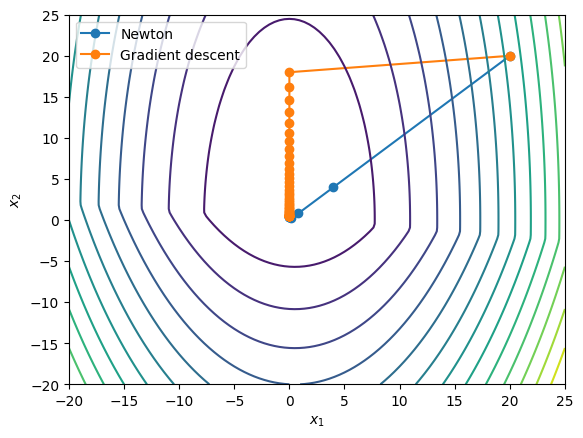

In [5]:
# Plot the history of x
import matplotlib.pyplot as plt
plt.plot([x[0] for x in x_hist], [x[1] for x in x_hist], 'o-')
# Plot the history of x for gradient descent
plt.plot([x[0] for x in x_hist_gd], [x[1] for x in x_hist_gd], 'o-')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
# Plot the contour of f
x1_ = np.linspace(-20, 25, 100)
x2_ = np.linspace(-20, 25, 100)
X1, X2 = np.meshgrid(x1_, x2_)
Z = fx(np.array([X1, X2]))
plt.contour(X1, X2, Z, 15)
plt.legend(['Newton', 'Gradient descent'])
plt.savefig('/app/newton.png')
plt.show()
